In [1]:
from transformers import AutoTokenizer, AutoModelForCausalLM

model_name = "deepseek-ai/deepseek-coder-1.3b-base"  # small-ish
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)


In [ ]:
tokenizer_gemma = AutoTokenizer.from_pretrained("google/gemma-2b")
model_gemma = AutoModelForCausalLM.from_pretrained("google/gemma-2b")

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [2]:
tokenizer_qwen = AutoTokenizer.from_pretrained("Qwen/Qwen2.5-0.5B")
model_qwen = AutoModelForCausalLM.from_pretrained("Qwen/Qwen2.5-0.5B")

In [ ]:
tokenizer_tinyllama = AutoTokenizer.from_pretrained("TinyLlama/TinyLlama_v1.1")
model_tinyllama = AutoModelForCausalLM.from_pretrained("TinyLlama/TinyLlama_v1.1")

pytorch_model.bin:   0%|          | 0.00/4.40G [00:00<?, ?B/s]

In [ ]:
# Encode some text into tokens
text = "你好世界"
tokens = tokenizer.encode(text)
print(tokens)

# Decode back into text
decoded = tokenizer.decode(tokens)
print(decoded)

# Inspect how it split the text
print([tokenizer.decode([t]) for t in tokens])


[32013, 1367, 1248, 4986]
<｜begin▁of▁sentence｜>你好世界
['<｜begin▁of▁sentence｜>', '你', '好', '世界']


In [ ]:
# convert ids -> token strings
tokens = [32013, 1367, 1248, 4986]
print(tokenizer.convert_ids_to_tokens(tokens))

# vocab size and specials
print("vocab size:", tokenizer.vocab_size)
print("all special tokens:", tokenizer.all_special_tokens)
print("special tokens map:", tokenizer.special_tokens_map)

# encode without adding special tokens (if you don't want BOS/EOS)
tokens = tokenizer.encode("你好世界", add_special_tokens=False)
print(tokens)

# show ID -> decoding for each id (what you already saw)
print([tokenizer.decode([t]) for t in tokens])

['<｜begin▁of▁sentence｜>', 'ä½ł', 'å¥½', 'ä¸ĸçķĮ']
vocab size: 32000
all special tokens: ['<｜begin▁of▁sentence｜>', '<｜end▁of▁sentence｜>']
special tokens map: {'bos_token': '<｜begin▁of▁sentence｜>', 'eos_token': '<｜end▁of▁sentence｜>', 'pad_token': '<｜end▁of▁sentence｜>'}
[1367, 1248, 4986]
['你', '好', '世界']


In [ ]:
with open("再别康桥.txt", "r") as f:
    text = f.read()
tokens = tokenizer.encode(text)
for t in tokens:
    print("token id:", t, "token str:", tokenizer.decode([t]))
print("length of tokens:", len(tokens))

token id: 32013 token str: <｜begin▁of▁sentence｜>
token id: 4642 token str: 轻
token id: 4642 token str: 轻
token id: 337 token str: 的
token id: 848 token str: 我
token id: 26388 token str: 走了
token id: 19385 token str: ，
token id: 185 token str: 

token id: 2198 token str: 正
token id: 1410 token str: 如
token id: 848 token str: 我
token id: 4642 token str: 轻
token id: 4642 token str: 轻
token id: 337 token str: 的
token id: 908 token str: 来
token id: 1989 token str: ；
token id: 185 token str: 

token id: 848 token str: 我
token id: 4642 token str: 轻
token id: 4642 token str: 轻
token id: 337 token str: 的
token id: 6716 token str: 招
token id: 1897 token str: 手
token id: 19385 token str: ，
token id: 185 token str: 

token id: 1147 token str: 作
token id: 2501 token str: 别
token id: 2787 token str: 西
token id: 17881 token str: 天的
token id: 5973 token str: 云
token id: 7817 token str: 彩
token id: 397 token str: 。
token id: 185 token str: 

token id: 185 token str: 

token id: 1865 token str: 那
token 

In [ ]:
from transformers import AutoTokenizer

tokenizer_gemma = AutoTokenizer.from_pretrained("google/gemma-2b")

In [ ]:
tokens = tokenizer_gemma.encode(text)
print("vocab size:", tokenizer_gemma.vocab_size)
for t in tokens:
    print("token id:", t, "token str:", tokenizer_gemma.decode([t]))
print("length of tokens:", len(tokens))

vocab size: 256000
token id: 2 token str: <bos>
token id: 79424 token str: 轻轻
token id: 153698 token str: 的我
token id: 44913 token str: 走了
token id: 235365 token str: ，
token id: 108 token str: 

token id: 161181 token str: 正如
token id: 235509 token str: 我
token id: 79424 token str: 轻轻
token id: 235370 token str: 的
token id: 235547 token str: 来
token id: 236334 token str: ；
token id: 108 token str: 

token id: 235509 token str: 我
token id: 79424 token str: 轻轻
token id: 235370 token str: 的
token id: 237219 token str: 招
token id: 235616 token str: 手
token id: 235365 token str: ，
token id: 108 token str: 

token id: 235591 token str: 作
token id: 236273 token str: 别
token id: 235990 token str: 西
token id: 55881 token str: 天的
token id: 236537 token str: 云
token id: 236729 token str: 彩
token id: 235362 token str: 。
token id: 109 token str: 


token id: 235779 token str: 那
token id: 236811 token str: 河
token id: 241225 token str: 畔
token id: 172765 token str: 的金
token id: 238110 token str: 柳


In [ ]:
import torch
# Example with DeepSeek

# Your input so far (the context)
inputs = tokenizer(text, return_tensors="pt")

# Run the model
with torch.no_grad():
    outputs = model(**inputs)

# Get logits for the next token prediction
logits = outputs.logits[0, -1, :]  # last token's logits
print(logits.shape)  # should be (vocab_size,)
# print top 10 logits
print(torch.topk(logits, 10))
probs = torch.softmax(logits, dim=-1)

# Find top probable tokens
top_probs, top_indices = torch.topk(probs, 10)
for i, p in zip(top_indices, top_probs):
    print(f"{tokenizer.decode(i)}: {p.item():.5f}")


torch.Size([32256])
torch.return_types.topk(
values=tensor([ -5.1992,  -9.2840, -12.1456, -12.1604, -12.3317, -12.6403, -12.7734,
        -12.8906, -13.4317, -13.4851]),
indices=tensor([  185, 32014,    63,   207,    58,   971,  1183,    59,  4191,   397]))

: 0.97643
<｜end▁of▁sentence｜>: 0.01643
`: 0.00094
 : 0.00093
[: 0.00078
”: 0.00057
',: 0.00050
\: 0.00045
'': 0.00026
。: 0.00025


In [ ]:
# print special tokens of tokenizer
print(tokenizer.all_special_tokens)

['<｜begin▁of▁sentence｜>', '<｜end▁of▁sentence｜>']


In [ ]:
from llm_codec import LLM_Encode
with open("Shall I Compare Thee To a Summer's Day.txt", "r") as f:
    text = f.read()
precision = 128
llm_encoder = LLM_Encode(tokenizer=tokenizer, model=model, precision=precision, context_window=10000)
encoded_bytes = llm_encoder.encode(text, demo=False, demo_csv_path="llm_encode_probs.csv")
size_of_original = len(text.encode('utf-8'))
size_of_encoded = len(encoded_bytes)
compression_ratio = size_of_original / size_of_encoded
print(f"Original size (bytes): {size_of_original}")
print(f"Encoded size (bytes): {size_of_encoded}")
print(f"Compression ratio (original/encoded): {compression_ratio:.4f}")
print("Encoded bytes (hex):", encoded_bytes.hex())

Encoding tokens. Progress:


100%|██████████| 179/179 [00:56<00:00,  3.15it/s]

Original size (bytes): 638
Encoded size (bytes): 21
Compression ratio (original/encoded): 30.3810
Encoded bytes (hex): 9108f21b545d8a120f1458c148b32ca1a67ab32620


In [ ]:
# print special tokens of tokenizer
print(tokenizer.all_special_tokens)

['<｜begin▁of▁sentence｜>', '<｜end▁of▁sentence｜>', '<EOF>']


In [ ]:
from llm_codec import LLM_Decode
llm_decoder = LLM_Decode(tokenizer=tokenizer, model=model, precision=precision)
decoded_text = llm_decoder.decode(encoded_bytes)
print("Decoded text:", decoded_text)
print("Decoded text matches original?", decoded_text == text)

KeyboardInterrupt: 

In [ ]:
tokenizer2 = AutoTokenizer.from_pretrained(model_name)
model2 = AutoModelForCausalLM.from_pretrained(model_name)

# print special tokens of tokenizer2
print(tokenizer2.all_special_tokens)

llm_decoder = LLM_Decode(tokenizer=tokenizer2, model=model2, precision=precision)
decoded_text = llm_decoder.decode(encoded_bytes)
print("Decoded text:", decoded_text)
print("Decoded text matches original?", decoded_text == text)

print(tokenizer2.all_special_tokens)

['<｜begin▁of▁sentence｜>', '<｜end▁of▁sentence｜>']
Decoded text: 轻轻的我走了，
正如我轻轻的来；
我轻轻的招手，
作别西天的云彩。

那河畔的金柳，
是夕阳中的新娘；
波光里的艳影，
在我的心头荡漾。

软泥上的青荇，
油油的在水底招摇；
在康河的柔波里，
我甘心做一条水草！

那榆荫下的一潭，
不是清泉，是天上虹；
揉碎在浮藻间，
沉淀着彩虹似的梦。

寻梦？撑一支长篙，
向青草更青处漫溯；
满载一船星辉，
在星辉斑斓里放歌。

但我不能放歌，
悄悄是别离的笙箫；
夏虫也为我沉默，
沉默是今晚的康桥！

悄悄的我走了，
正如我悄悄的来；
我挥一挥衣袖，
不带走一片云彩。
Decoded text matches original? True
['<｜begin▁of▁sentence｜>', '<｜end▁of▁sentence｜>', '<EOF>']


In [ ]:
from llm_codec import LLM_Encode
with open("Shall I Compare Thee To a Summer's Day.txt", "r") as f:
    text = f.read()
precision = 128
llm_encoder = LLM_Encode(tokenizer=tokenizer, model=model, precision=precision)
encoded_bytes = llm_encoder.encode(text, demo=True, demo_csv_path="llm_encode_probs.csv")
size_of_original = len(text.encode('utf-8'))
size_of_encoded = len(encoded_bytes)





Encoding tokens. Progress:


100%|██████████| 179/179 [00:57<00:00,  3.13it/s]

Original size (bytes): 638
Encoded size (bytes): 21
Compression ratio (encoded/original): 0.2633
Encoded bytes (hex): 9108f21b545d8a120f1458c148b32ca1a67ab32620


In [ ]:
# compression ratio in output bits/input byte is
compression_ratio_english_llm = size_of_encoded * 8 / size_of_original
print(f"Original size (bytes): {size_of_original}")
print(f"Encoded size (bytes): {size_of_encoded}")
print(f"Compression ratio (encoded/original): {compression_ratio_english_llm:.4f}")
print("Encoded bytes (hex):", encoded_bytes.hex())

Original size (bytes): 638
Encoded size (bytes): 21
Compression ratio (encoded/original): 0.2633
Encoded bytes (hex): 9108f21b545d8a120f1458c148b32ca1a67ab32620


In [ ]:
# calculate total cross-entropy based on realized token probabilities
import pandas as pd
import numpy as np
df_english_llm = pd.read_csv("llm_encode_probs.csv")
probs = df_english_llm['probability'].to_numpy()
token_bits = -np.log2(probs)
total_bits_english_llm = float(np.sum(token_bits))
avg_bits_per_token_english = float(np.mean(token_bits))
print(f"Avg bits/token (LLM probabilities): {avg_bits_per_token_english:.4f}")
print(f"Total ideal bits for sequence: {total_bits_english_llm:.2f}")

Avg bits/token (LLM probabilities): 0.9099
Total ideal bits for sequence: 162.87


In [ ]:
lower_bound_encoded_size_english_llm = total_bits_english_llm / 8
print("Lower bound encoded size (bytes):", lower_bound_encoded_size_english_llm)
lower_bound_compression_ratio_english_llm = total_bits_english_llm / size_of_original
print("Lower bound compression ratio (bits/byte):", lower_bound_compression_ratio_english_llm)


Lower bound encoded size (bytes): 20.358180632519367
Lower bound compression ratio (bits/byte): 0.25527499225729616


In [ ]:
# decode
from llm_codec import LLM_Decode
llm_decoder = LLM_Decode(tokenizer=tokenizer, model=model, precision=precision)
decoded_text = llm_decoder.decode(encoded_bytes)
print("Decoded text:", decoded_text)
print("Decoded text matches original?", decoded_text == text)

Decoded text: Shall I compare thee to a summer’s day?
Thou art more lovely and more temperate:
Rough winds do shake the darling buds of May,
And summer’s lease hath all too short a date;
Sometime too hot the eye of heaven shines,
And often is his gold complexion dimm'd;
And every fair from fair sometime declines,
By chance or nature’s changing course untrimm'd;
But thy eternal summer shall not fade,
Nor lose possession of that fair thou ow’st;
Nor shall death brag thou wander’st in his shade,
When in eternal lines to time thou grow’st:
   So long as men can breathe or eyes can see,
   So long lives this, and this gives life to thee.
Decoded text matches original? True


In [ ]:
# different context window size
# with open("Shall I Compare Thee To a Summer's Day.txt", "r") as f:
#     text = f.read()
# precision = 128
# llm_encoder = LLM_Encode(tokenizer=tokenizer, model=model, precision=precision, context_window=50)
# encoded_bytes = llm_encoder.encode(text, demo=True, demo_csv_path="llm_encode_probs.csv")
# size_of_original = len(text.encode('utf-8'))
# size_of_encoded = len(encoded_bytes)
# # compression ratio in bits/byte is
# compression_ratio_english_llm = size_of_encoded / (size_of_original * 8)
# print(f"Original size (bytes): {size_of_original}")
# print(f"Encoded size (bytes): {size_of_encoded}")
# print(f"Compression ratio (encoded/original): {compression_ratio_english_llm:.4f}")
# print("Encoded bytes (hex):", encoded_bytes.hex())

Encoding tokens. Progress:


100%|██████████| 179/179 [00:47<00:00,  3.75it/s]

Original size (bytes): 638
Encoded size (bytes): 27
Compression ratio (encoded/original): 0.0053
Encoded bytes (hex): 9108f21b545d8a12220a07906025e46325eaae18c38292cb4a9e00


In [ ]:
# decode with different context window size
# from llm_codec import LLM_Decode
# llm_decoder = LLM_Decode(tokenizer=tokenizer, model=model, precision=precision, context_window=50)
# decoded_text = llm_decoder.decode(encoded_bytes)
# print("Decoded text:", decoded_text)
# print("Decoded text matches original?", decoded_text == text)

Decoded text: Shall I compare thee to a summer’s day?
Thou art more lovely and more temperate:
Rough winds do shake the darling buds of May,
And summer’s lease hath all too short a date;
Sometime too hot the eye of heaven shines,
And often is his gold complexion dimm'd;
And every fair from fair sometime declines,
By chance or nature’s changing course untrimm'd;
But thy eternal summer shall not fade,
Nor lose possession of that fair thou ow’st;
Nor shall death brag thou wander’st in his shade,
When in eternal lines to time thou grow’st:
   So long as men can breathe or eyes can see,
   So long lives this, and this gives life to thee.
Decoded text matches original? True


In [ ]:
# compare with gzip
import gzip
import math
from collections import Counter
from heapq import heapify, heappop, heappush
from itertools import count

with open("Shall I Compare Thee To a Summer's Day.txt", "rb") as f:
    original_data = f.read()
compressed_data = gzip.compress(original_data)
# size of original in bytes
size_of_original = len(original_data)
# size of gzip compressed in bytes
size_of_gzip = len(compressed_data)
print(f"Gzip compressed size (bytes): {size_of_gzip}")
# compression ratio in bits/byte
compression_ratio_english_gzip = (size_of_gzip * 8) / size_of_original
print(f"Gzip compression ratio (bits/byte): {compression_ratio_english_gzip:.4f}")


# calculate total entropy based on letters and their frequencies
with open("Shall I Compare Thee To a Summer's Day.txt", "r") as f:
    text = f.read()
char_counts = Counter(text)
total_chars = sum(char_counts.values())
entropy_english_letter = -sum((count_ / total_chars) * np.log2(count_ / total_chars) for count_ in char_counts.values())
print("Entropy based on letters and frequencies (bits):", entropy_english_letter)
lower_bound_encoded_size_english_letter = entropy_english_letter * len(text)
print("Lower bound encoded size (bits):", lower_bound_encoded_size_english_letter)
lower_bound_compression_ratio_english_letter = lower_bound_encoded_size_english_letter / size_of_original
print("Lower bound compression ratio (bits/byte):", lower_bound_compression_ratio_english_letter)

Gzip compressed size (bytes): 382
Gzip compression ratio (bits/byte): 4.7900
Entropy based on letters and frequencies (bits): 4.373921782523561
Lower bound encoded size (bits): 2738.0750358597493
Lower bound compression ratio (bits/byte): 4.291653661222178


In [ ]:
# now for 再别康桥.txt
from llm_codec import LLM_Encode
with open("再别康桥.txt", "r") as f:
    text = f.read()
precision = 128
llm_encoder = LLM_Encode(tokenizer=tokenizer, model=model, precision=precision)
encoded_bytes = llm_encoder.encode(text, demo=True, demo_csv_path="llm_encode_probs.csv")



Encoding tokens. Progress:


100%|██████████| 262/262 [01:35<00:00,  2.76it/s]


In [ ]:
size_of_original = len(text.encode('utf-8'))
size_of_encoded = len(encoded_bytes)
# compression ratio in bits/byte is
compression_ratio_chinese_llm = (size_of_encoded * 8) / size_of_original
print(f"Original size (bytes): {size_of_original}")
print(f"Encoded size (bytes): {size_of_encoded}")
print(f"Compression ratio (encoded bits/original byte): {compression_ratio_chinese_llm:.4f}")
print("Encoded bytes (hex):", encoded_bytes.hex())

# calculate total cross-entropy based on tokens and their probabilities
df_chinese_llm = pd.read_csv("llm_encode_probs.csv")
probs_ch = df_chinese_llm['probability'].to_numpy()
token_bits_chinese = -np.log2(probs_ch)
total_bits_chinese_llm = float(np.sum(token_bits_chinese))
avg_bits_per_token_chinese = float(np.mean(token_bits_chinese))
print(f"Avg bits/token (LLM probabilities): {avg_bits_per_token_chinese:.4f}")
print(f"Total ideal bits for sequence: {total_bits_chinese_llm:.2f}")
entropy_chinese_llm = total_bits_chinese_llm
lower_bound_encoded_size_chinese_llm = total_bits_chinese_llm
print("Lower bound encoded size (bits):", lower_bound_encoded_size_chinese_llm)
lower_bound_compression_ratio_chinese_llm = total_bits_chinese_llm / size_of_original
print("Lower bound token based compression ratio (bits/byte):", lower_bound_compression_ratio_chinese_llm)

Original size (bytes): 705
Encoded size (bytes): 99
Compression ratio (encoded bits/original byte): 1.1234
Encoded bytes (hex): a29c16e6ee9b3589ef0f328663a6d35f642218382c5a12098d764de444da88a2adaa328ffd7708197875d0a89eaace822b11ff692e7f1b26deda116b847d6bd1da08f2faa74092706198730c154d52a6046dd5a97c5361de4be1bfee923895c6ee9750
Avg bits/token (LLM probabilities): 3.0012
Total ideal bits for sequence: 786.32
Lower bound encoded size (bits): 786.3219092938598
Lower bound token based compression ratio (bits/byte): 1.1153502259487373


In [ ]:
# compare with compression ratio in bits/byte using gzip
import gzip
with open("再别康桥.txt", "rb") as f:
    original_data = f.read()
compressed_data = gzip.compress(original_data)
print(f"Gzip compressed size (bytes): {len(compressed_data)}")
compression_ratio_chinese_gzip = (len(compressed_data) * 8) / len(original_data)
print(f"Gzip compression ratio (compressed/original): {compression_ratio_chinese_gzip:.4f}")

# calculate total entropy based on letters and their frequencies
text = original_data.decode('utf-8')
char_counts = Counter(text)
total_chars = sum(char_counts.values())
entropy_chinese_letter = -sum((count / total_chars) * np.log2(count / total_chars) for count in char_counts.values())
print("Total entropy based on letters and frequencies (bits):", entropy_chinese_letter)
lower_bound_encoded_size_chinese_letter = entropy_chinese_letter * len(text)
print("Lower bound encoded size (bits):", lower_bound_encoded_size_chinese_letter)
lower_bound_compression_ratio_chinese_letter = lower_bound_encoded_size_chinese_letter / size_of_original
print("Lower bound compression ratio (bits/byte):", lower_bound_compression_ratio_chinese_letter)

Gzip compressed size (bytes): 455
Gzip compression ratio (compressed/original): 5.1631
Total entropy based on letters and frequencies (bits): 6.02385968527653
Lower bound encoded size (bits): 1548.131939116068
Lower bound compression ratio (bits/byte): 2.1959318285334297


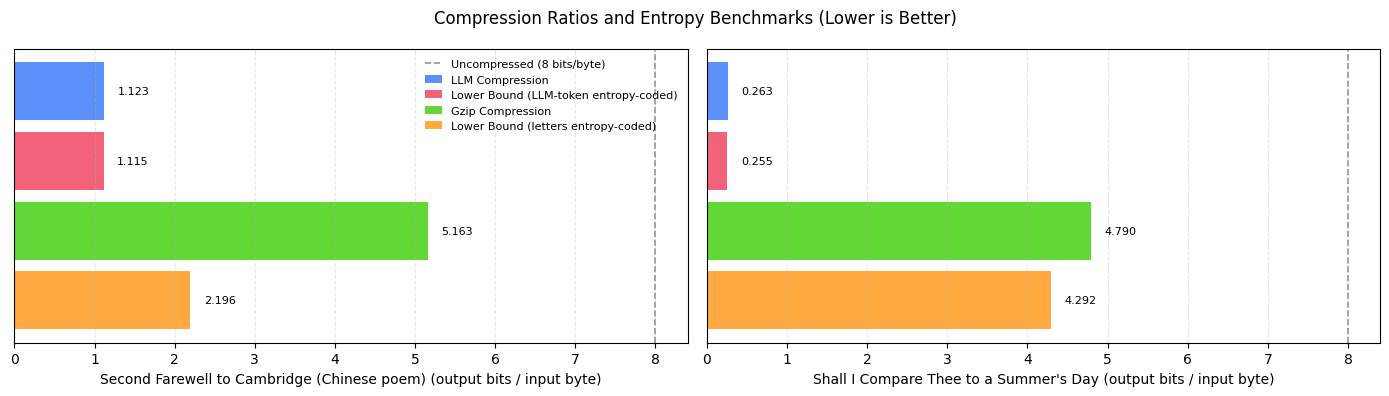

In [ ]:
# compare compression ratios for both texts on uncompressed, gzip, entropy based on letters and frequencies, llm-based compression, and entropy based on llm token probabilities
import os
import matplotlib.pyplot as plt


english_text_path = "Shall I Compare Thee To a Summer's Day.txt"
chinese_text_path = "再别康桥.txt"



def plot_locale(
    ax,
    title,
    llm_ratio,
    gzip_ratio,
    letter_entropy_ratio,
    llm_entropy_ratio,
    xmax,
):
    ax.axvline(8.0, color="#969696", linestyle="--", linewidth=1.2, label="Uncompressed (8 bits/byte)")
    bars = [
        (0.45, llm_ratio, "#5b8ff9", "LLM Compression"),
        (0.15, llm_entropy_ratio, "#f2637b", "Lower Bound (LLM-token entropy-coded)"),
        (-0.15, gzip_ratio, "#61d836", "Gzip Compression"),
        (-0.45, letter_entropy_ratio, "#ffa940", "Lower Bound (letters entropy-coded)"),
    ]
    offset = xmax * 0.02
    for y, value, color, label in bars:
        ax.barh([y], [value], height=0.25, color=color, label=label)
        text_x = min(value + offset, xmax)
        ax.text(text_x, y, f"{value:.3f}", va="center", ha="left", fontsize=8)
    ax.set_xlim(0, xmax)
    ax.set_yticks([])
    ax.set_xlabel(f"{title} (output bits / input byte)")
    ax.grid(axis="x", linestyle="--", alpha=0.3)


chinese_xmax = max(
    8.0,
    compression_ratio_chinese_llm,
    compression_ratio_chinese_gzip,
    lower_bound_compression_ratio_chinese_letter,
    lower_bound_compression_ratio_chinese_llm,
) * 1.05
english_xmax = max(
    8.0,
    compression_ratio_english_llm,
    compression_ratio_english_gzip,
    lower_bound_compression_ratio_english_letter,
    lower_bound_compression_ratio_english_llm,
) * 1.05

fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharex=False)
plot_locale(
    axes[0],
    "Second Farewell to Cambridge (Chinese poem)",
    compression_ratio_chinese_llm,
    compression_ratio_chinese_gzip,
    lower_bound_compression_ratio_chinese_letter,
    lower_bound_compression_ratio_chinese_llm,
    xmax=chinese_xmax,
)
plot_locale(
    axes[1],
    "Shall I Compare Thee to a Summer's Day",
    compression_ratio_english_llm,
    compression_ratio_english_gzip,
    lower_bound_compression_ratio_english_letter,
    lower_bound_compression_ratio_english_llm,
    xmax=english_xmax,
)


handles, labels = axes[0].get_legend_handles_labels()
unique_handles = {}
for handle, label in zip(handles, labels):
    if label not in unique_handles:
        unique_handles[label] = handle
axes[0].legend(
    unique_handles.values(),
    unique_handles.keys(),
    loc="upper right",
    frameon=False,
    fontsize=8,
    handlelength=1.5,
)
fig.suptitle("Compression Ratios and Entropy Benchmarks (Lower is Better)")
plt.tight_layout()
plt.show()


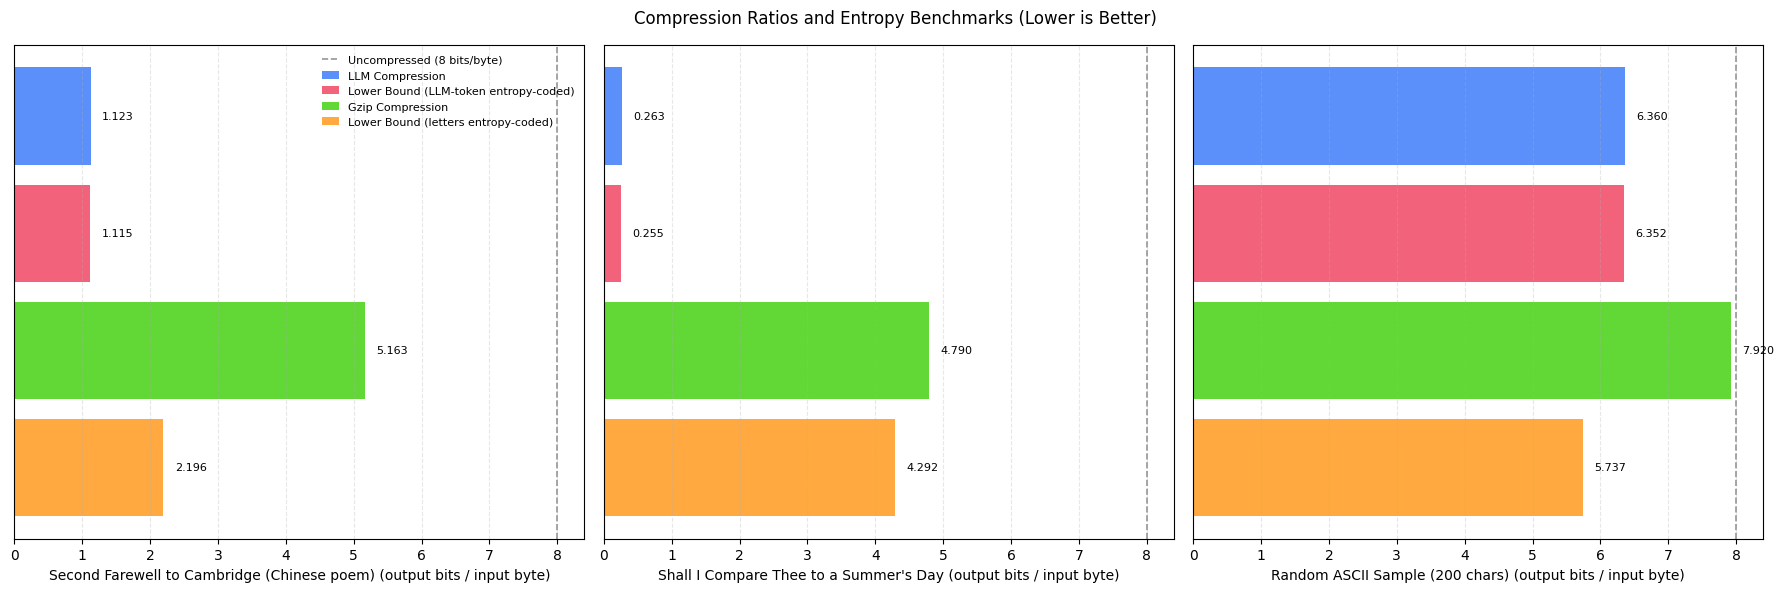

In [ ]:
# add random-text subplot next to the locale comparisons
random_xmax = max(
    8.0,
    compression_ratio_random_llm,
    compression_ratio_random_gzip,
    lower_bound_compression_ratio_random_letter,
    lower_bound_compression_ratio_random_llm,
) * 1.05

chinese_xmax = max(
    8.0,
    compression_ratio_chinese_llm,
    compression_ratio_chinese_gzip,
    lower_bound_compression_ratio_chinese_letter,
    lower_bound_compression_ratio_chinese_llm,
) * 1.05
english_xmax = max(
    8.0,
    compression_ratio_english_llm,
    compression_ratio_english_gzip,
    lower_bound_compression_ratio_english_letter,
    lower_bound_compression_ratio_english_llm,
) * 1.05

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=False)
plot_locale(
    axes[0],
    "Second Farewell to Cambridge (Chinese poem)",
    compression_ratio_chinese_llm,
    compression_ratio_chinese_gzip,
    lower_bound_compression_ratio_chinese_letter,
    lower_bound_compression_ratio_chinese_llm,
    xmax=chinese_xmax,
)
plot_locale(
    axes[1],
    "Shall I Compare Thee to a Summer's Day",
    compression_ratio_english_llm,
    compression_ratio_english_gzip,
    lower_bound_compression_ratio_english_letter,
    lower_bound_compression_ratio_english_llm,
    xmax=english_xmax,
)
plot_locale(
    axes[2],
    "Random ASCII Sample (200 chars)",
    compression_ratio_random_llm,
    compression_ratio_random_gzip,
    lower_bound_compression_ratio_random_letter,
    lower_bound_compression_ratio_random_llm,
    xmax=random_xmax,
)

handles, labels = axes[0].get_legend_handles_labels()
unique_handles = {}
for handle, label in zip(handles, labels):
    if label not in unique_handles:
        unique_handles[label] = handle
axes[0].legend(
    unique_handles.values(),
    unique_handles.keys(),
    loc="upper right",
    frameon=False,
    fontsize=8,
    handlelength=1.5,
)
fig.suptitle("Compression Ratios and Entropy Benchmarks (Lower is Better)")
plt.tight_layout()
plt.show()

In [ ]:
# make a table comparing file sizes before and after compression for all three texts
import pandas as pd
data = {
    "Text": [
        "Shall I Compare Thee To a Summer's Day",
        "Second Farewell to Cambridge (Chinese poem)",
        "Random ASCII Sample (200 chars)",
    ],
    "Original Size (bytes)": [
        size_of_original_english,
        size_of_original_chinese,
        size_of_original_random,
    ],
    "Gzip Compressed Size (bytes)": [
        size_of_gzip_english,
        size_of_gzip_chinese,
        size_of_gzip_random,
    ],
    "LLM Compressed Size (bytes)": [
        size_of_encoded_english,
        size_of_encoded_chinese,
        size_of_encoded_random,
    ],
}
df_sizes = pd.DataFrame(data)
print(df_sizes)

NameError: name 'size_of_original_english' is not defined

/var/folders/9q/kr6k165j47b7qv4mlqdh4_9r0000gn/T/ipykernel_51067/1000085345.py:23: UserWarning: Glyph 65372 (\N{FULLWIDTH VERTICAL LINE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65372 (\N{FULLWIDTH VERTICAL LINE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


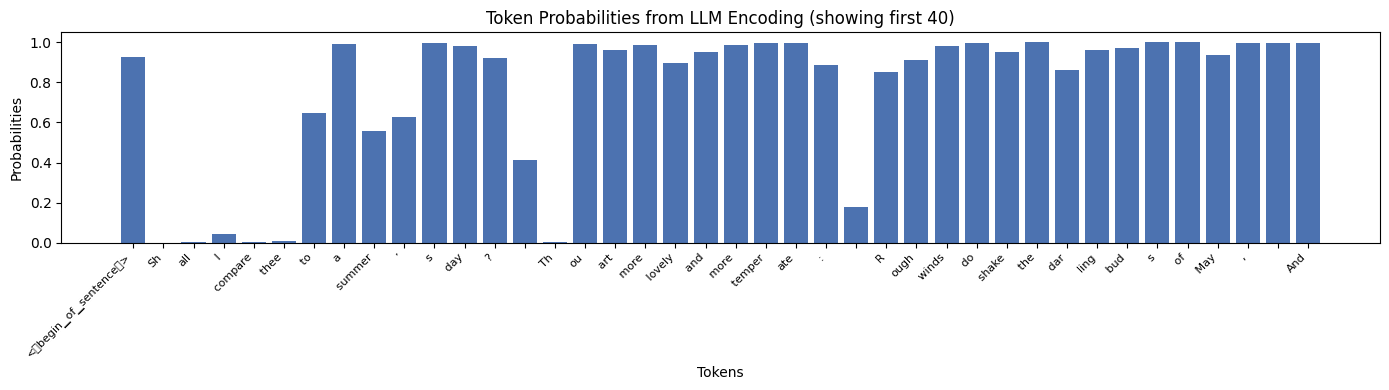

In [ ]:
# read llm_encode_probs.csv, plot probabilities vs. token texts, make plot long enough to see all tokens clearly
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gzip

df = pd.read_csv("llm_encode_probs.csv")
tokens = df['token_text'].tolist()
probs = df['probability'].to_numpy()

token_bits = -np.log2(probs)
total_bits_sequence = float(np.sum(token_bits))
avg_bits_per_token = float(np.mean(token_bits))
print(f"Avg bits/token from LLM probabilities: {avg_bits_per_token:.4f}")
print(f"Total ideal bits for this sequence: {total_bits_sequence:.2f}")

# gzip entropy estimate
with open("llm_encode_probs.txt", "w") as f:
    for token, prob in zip(tokens, probs):
        f.write(f"{token}\t{prob}\n")
with open("llm_encode_probs.txt", "rb") as f:
    data = f.read()
compressed_data = gzip.compress(data)
gzip_entropy_estimate = (len(compressed_data) * 8) / max(len(tokens), 1)
print(f"Gzip entropy estimate: {gzip_entropy_estimate:.4f} bits/token")


In [ ]:
max_tokens = 40
if len(tokens) > max_tokens:
    tokens = tokens[:max_tokens]
    probs = probs[:max_tokens]
    note = f" (showing first {max_tokens})"
else:
    note = ""

plt.figure(figsize=(14,4))
plt.bar(range(len(tokens)), probs, color="#4c72b0")
plt.xticks(range(len(tokens)), tokens, rotation=45, ha='right', fontsize=8)
plt.xlabel("Tokens")
plt.ylabel("Probabilities")
plt.title(f"Token Probabilities, LLM Encoding of Sonnet using DeepSeek Coder 1.3B {note}")
plt.tight_layout()
plt.show()

In [ ]:
# compress a randomly generated text of length 200 characters
import random
import string
from llm_codec import LLM_Encode
random_text = ''.join(random.choices(string.ascii_letters + string.digits + ' ', k=200))
precision = 128
llm_encoder = LLM_Encode(tokenizer=tokenizer, model=model, precision=precision, context_window=200)
encoded_bytes = llm_encoder.encode(random_text, demo=True, demo_csv_path="llm_encode_probs.csv")
size_of_original = len(random_text.encode('utf-8'))
size_of_encoded = len(encoded_bytes)
compression_ratio_random_llm = (size_of_encoded * 8) / size_of_original
print(f"Original size (bytes): {size_of_original}")
print(f"Encoded size (bytes): {size_of_encoded}")
print(f"Compression ratio (encoded/original): {compression_ratio_random_llm:.4f}")



Encoding tokens. Progress:


100%|██████████| 163/163 [00:51<00:00,  3.16it/s]

Original size (bytes): 200
Encoded size (bytes): 159
Compression ratio (encoded/original): 6.3600
Gzip compressed size (bytes): 198
Gzip compression ratio (compressed/original): 7.9200


In [ ]:
# calculate lower bound based on token probabilities
df_random_llm = pd.read_csv("llm_encode_probs.csv")
probs_random = df_random_llm['probability'].to_numpy()
token_bits_random = -np.log2(probs_random)
total_bits_random_llm = float(np.sum(token_bits_random))
avg_bits_per_token_random = float(np.mean(token_bits_random))
print(f"Avg bits/token (LLM probabilities): {avg_bits_per_token_random:.4f}")
print(f"Total ideal bits for sequence: {total_bits_random_llm:.2f}")
lower_bound_encoded_size_random_llm = total_bits_random_llm / 8
print("Lower bound encoded size (bytes):", lower_bound_encoded_size_random_llm)
lower_bound_compression_ratio_random_llm = total_bits_random_llm / size_of_original
print("Lower bound compression ratio (bits/byte):", lower_bound_compression_ratio_random_llm)

# compare with gzip
import gzip
compressed_random_text = gzip.compress(random_text.encode('utf-8'))
size_of_compressed_random_text = len(compressed_random_text)
compression_ratio_random_gzip = (size_of_compressed_random_text * 8) / size_of_original
print(f"Gzip compressed size (bytes): {size_of_compressed_random_text}")
print(f"Gzip compression ratio (compressed/original): {compression_ratio_random_gzip:.4f}")

# calculate entropy based on letters and their frequencies
char_counts_random = Counter(random_text)
total_chars_random = sum(char_counts_random.values())
entropy_random_letter = -sum((count / total_chars_random) * np.log2(count / total_chars_random) for count in char_counts_random.values())
print("Entropy based on letters and frequencies (bits):", entropy_random_letter)
lower_bound_encoded_size_random_letter = entropy_random_letter * len(random_text)
print("Lower bound encoded size (bits):", lower_bound_encoded_size_random_letter)
lower_bound_compression_ratio_random_letter = lower_bound_encoded_size_random_letter / size_of_original
print("Lower bound compression ratio (bits/byte):", lower_bound_compression_ratio_random_letter)

Avg bits/token (LLM probabilities): 7.7934
Total ideal bits for sequence: 1270.32
Lower bound encoded size (bytes): 158.79045883924837
Lower bound compression ratio (bits/byte): 6.351618353569935
Gzip compressed size (bytes): 198
Gzip compression ratio (compressed/original): 7.9200
Entropy based on letters and frequencies (bits): 5.736817660374172
Lower bound encoded size (bits): 1147.3635320748344
Lower bound compression ratio (bits/byte): 5.7368176603741725


In [ ]:
# plot the token probabilities from llm_encode_probs.csv for the random text on the left, and a bar plot comparing compression ratios between LLM and gzip on the right
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("llm_encode_probs.csv")
tokens = df['token_text'].tolist()
probs = df['probability'].tolist()

fig, axes = plt.subplots(1, 2, figsize=(15, 4))
axes[0].bar(tokens[:40], probs[:40], color='skyblue', width=0.8)
axes[0].set_xlabel('Tokens', fontsize=10)
axes[0].set_ylabel('Probability', fontsize=10)
axes[0].set_title(f'Token Probabilities (first {min(40, len(tokens))})', fontsize=11)
axes[0].tick_params(axis='x', rotation=60, labelsize=7)
axes[0].tick_params(axis='y', labelsize=9)

compression_labels = ['LLM Compression', 'Gzip Compression']
compression_values = [compression_ratio_random_llm, compression_ratio_random_gzip]
bar_colors = ['#5b8ff9', '#61d836']
bars = axes[1].bar(compression_labels, compression_values, color=bar_colors, width=0.5)
axes[1].set_ylabel('Compression Ratio (bits/byte)', fontsize=10)
axes[1].set_title('Random Text Compression Comparison', fontsize=11)
axes[1].axhline(8.0, color='#969696', linestyle='--', linewidth=1.2, label='Uncompressed (8 bits/byte)')
for bar, value in zip(bars, compression_values):
    axes[1].text(
        bar.get_x() + bar.get_width() / 2,
        value + 0.08,
        f"{value:.2f}",
        ha='center',
        va='bottom',
        fontsize=9,
    )
axes[1].set_ylim(0, max(8.2, max(compression_values) * 1.15))
axes[1].legend(loc='upper right', fontsize=8, frameon=False)

plt.tight_layout()
plt.show()


SyntaxError: invalid syntax (145936948.py, line 24)

In [ ]:
# using gemma 2b to compress Shall I Compare Thee To a Summer's Day.txt
from llm_codec import LLM_Encode
with open("Shall I Compare Thee To a Summer's Day.txt", "r") as f:
    text = f.read()
precision = 128
llm_encoder = LLM_Encode(tokenizer=tokenizer_gemma, model=model_gemma, precision=precision)
encoded_bytes = llm_encoder.encode(text, demo=True, demo_csv_path="llm_encode_probs_gemma.csv")
size_of_original = len(text.encode('utf-8'))
size_of_encoded = len(encoded_bytes)
# compression ratio in bits/byte is
compression_ratio_english_llm_gemma = size_of_encoded / (size_of_original * 8)
print(f"Original size (bytes): {size_of_original}")
print(f"Encoded size (bytes): {size_of_encoded}")
print(f"Compression ratio (encoded/original): {compression_ratio_english_llm_gemma:.4f}")
print("Encoded bytes (hex):", encoded_bytes.hex())

# plot token probabilities from gemma encoding
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("llm_encode_probs_gemma.csv")
tokens = df['token_text'].tolist()
probs = df['probability'].tolist()
plt.figure(figsize=(12, 6))
plt.bar(tokens[:40], probs[:40], color='lightgreen')
plt.xlabel('Tokens')
plt.ylabel('Probability')
plt.title(f'Token Probabilities from Gemma LLM Encoding, showing the first {min(40, len(tokens))} tokens')
plt.xticks(rotation=90)
plt.show()

The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`


Encoding tokens. Progress:


  0%|          | 0/166 [00:04<?, ?it/s]



KeyboardInterrupt: 

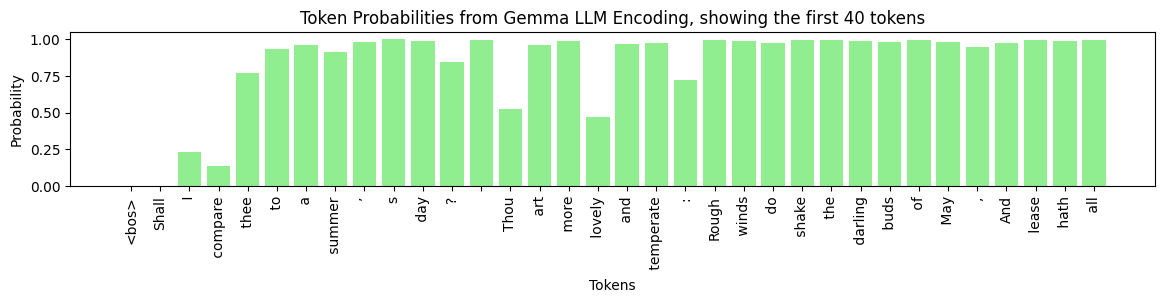

In [ ]:
# plot token probabilities from gemma encoding
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("llm_encode_probs_gemma.csv")
tokens = df['token_text'].tolist()
probs = df['probability'].tolist()
plt.figure(figsize=(14, 2))
plt.bar(tokens[:40], probs[:40], color='lightgreen')
plt.xlabel('Tokens')
plt.ylabel('Probability')
plt.title(f'Token Probabilities from Gemma LLM Encoding, showing the first {min(40, len(tokens))} tokens')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# comparison of time taken to encode using deepseek coder 1.3b vs gzip
import time
from llm_codec import LLM_Encode
import gzip
with open("Shall I Compare Thee To a Summer's Day.txt", "r") as f:
    text = f.read()
precision = 128
# time llm encoding
llm_encoder = LLM_Encode(tokenizer=tokenizer, model=model, precision=precision, context_window=10000)
start_time = time.time()
encoded_bytes = llm_encoder.encode(text, demo=False)
llm_time = time.time() - start_time
print(f"LLM encoding time: {llm_time:.4f} seconds")
# time gzip compression
start_time = time.time()
compressed_data = gzip.compress(text.encode('utf-8'))
gzip_time = time.time() - start_time
print(f"Gzip compression time: {gzip_time:.4f} seconds")

Encoding tokens. Progress:


  0%|          | 0/179 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
100%|██████████| 179/179 [00:55<00:00,  3.22it/s]

LLM encoding time: 55.5688 seconds
Gzip compression time: 0.0001 seconds


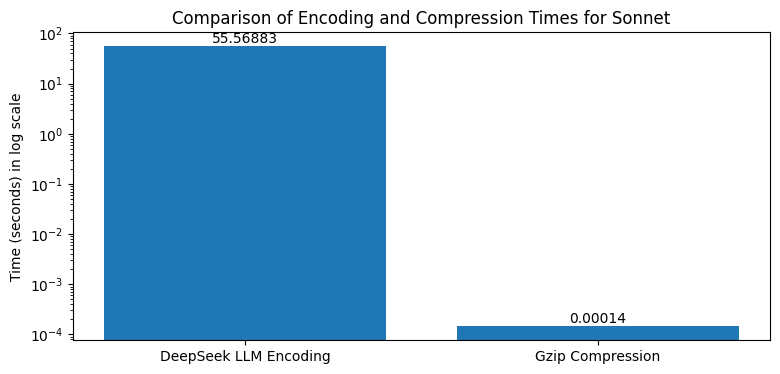

In [ ]:
# plot comparison, in logarithmic scale, mark time on the bars
import matplotlib.pyplot as plt
methods = ['DeepSeek LLM Encoding', 'Gzip Compression']
times = [llm_time, gzip_time]

# adjust size of plot
plt.figure(figsize=(9, 4))
plt.bar(methods, times)
plt.yscale('log')
plt.ylabel('Time (seconds) in log scale')
plt.title('Comparison of Encoding and Compression Times for Sonnet')
for i, v in enumerate(times):
    plt.text(i, v, f"{v:.5f}", ha='center', va='bottom')
plt.show()

In [3]:
# Round-trip compression using KV-cache encoder/decoder
from llm_codec_KV_cache import LLM_Encode_KV_Cache, LLM_Decode_KV_Cache
import time
with open("Shall I Compare Thee To a Summer's Day.txt", "r") as f:
    sonnet_text = f.read()
precision = 32
kv_encoder = LLM_Encode_KV_Cache(
    tokenizer=tokenizer,
    model=model,
    precision=precision,
    block_length=100,
 )
kv_encoded = kv_encoder.encode(sonnet_text, demo=False)
print(f"KV-encoded size (bytes): {len(kv_encoded)}")
kv_decoder = LLM_Decode_KV_Cache(
    tokenizer=tokenizer,
    model=model,
    precision=precision,
    block_length=100,
 )
tik = time.time()
decoded_sonnet = kv_decoder.decode(kv_encoded)
tok = time.time()
print(f"KV-decoding time: {tok - tik:.4f} seconds")
print("Decoded text matches original?", decoded_sonnet == sonnet_text)

Encoding tokens. Progress:


  0%|          | 0/179 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
100%|██████████| 179/179 [00:08<00:00, 20.47it/s]


KV-encoded size (bytes): 32
KV-decoding time: 7.9245 seconds
Decoded text matches original? True


In [4]:
# compare with gzip time
import gzip
tik = time.time()
compressed_data = gzip.compress(sonnet_text.encode('utf-8'))
tok = time.time()
print(f"Gzip compression time: {tok - tik:.4f} seconds")

Gzip compression time: 0.0002 seconds


In [5]:
# round-trip compression using KV-cache encoder/decoder using qwen 0.5b model
from llm_codec_KV_cache import LLM_Encode_KV_Cache, LLM_Decode_KV_Cache
import time
with open("Shall I Compare Thee To a Summer's Day.txt", "r") as f:
    sonnet_text = f.read()
precision = 32
kv_encoder = LLM_Encode_KV_Cache(
    tokenizer=tokenizer_qwen,
    model=model_qwen,
    precision=precision,
    block_length=100,
 )
tik = time.time()
kv_encoded = kv_encoder.encode(sonnet_text, demo=False)
tok = time.time()
print(f"KV-encoding time: {tok - tik:.4f} seconds")
print(f"KV-encoded size (bytes): {len(kv_encoded)}")
kv_decoder = LLM_Decode_KV_Cache(
    tokenizer=tokenizer_qwen,
    model=model_qwen,
    precision=precision,
    block_length=100,
 )
tik = time.time()
decoded_sonnet = kv_decoder.decode(kv_encoded)
tok = time.time()
print(f"KV-decoding time: {tok - tik:.4f} seconds")
print("Decoded text matches original?", decoded_sonnet == sonnet_text)

Encoding tokens. Progress:


100%|██████████| 151/151 [00:08<00:00, 18.14it/s]


KV-encoding time: 8.3254 seconds
KV-encoded size (bytes): 36
KV-decoding time: 8.2469 seconds
Decoded text matches original? True


In [6]:
# Compression using KV-cache encoder/decoder for alice29.txt
from llm_codec_KV_cache import LLM_Encode_KV_Cache, LLM_Decode_KV_Cache
import time
with open("alice29.txt", "r") as f:
    text = f.read()
precision = 32
kv_encoder = LLM_Encode_KV_Cache(
    tokenizer=tokenizer,
    model=model,
    precision=precision,
    block_length=100,
 )
tik = time.time()
kv_encoded = kv_encoder.encode(text, demo=False)
tok = time.time()
print(f"KV-encoding time: {tok - tik:.4f} seconds")
size_of_original = len(text.encode('utf-8'))
size_of_encoded = len(kv_encoded)
compression_ratio_kv_cache = (size_of_encoded * 8) / size_of_original
print(f"Original size (bytes): {size_of_original}")
print(f"KV-Cache Encoded size (bytes): {size_of_encoded}")
print(f"Compression ratio (encoded bits/original byte): {compression_ratio_kv_cache:.4f}")


Token indices sequence length is longer than the specified maximum sequence length for this model (42272 > 16384). Running this sequence through the model will result in indexing errors


Encoding tokens. Progress:


100%|██████████| 42273/42273 [30:34<00:00, 23.05it/s]

KV-encoding time: 1834.1886 seconds
Original size (bytes): 148481
KV-Cache Encoded size (bytes): 26092
Compression ratio (encoded bits/original byte): 1.4058


In [7]:
# encoding takes 1 hours 59 seconds 41 seconds
encoding_time_kv_cache_alice = tok - tik

In [8]:
# save kv_encoded to a new file
with open("alice29_kv_encoded.bin", "wb") as f:
    f.write(kv_encoded)

In [9]:
# gzip compress alice29.txt and compare sizes
import gzip
with open("alice29.txt", "rb") as f:
    original_data = f.read()
tik = time.time()
compressed_data = gzip.compress(original_data)
tok = time.time()
print(f"Gzip compression time: {tok - tik:.4f} seconds")
size_of_gzip = len(compressed_data)
compression_ratio_gzip = (size_of_gzip * 8) / len(original_data)
print(f"Gzip compressed size (bytes): {size_of_gzip}")
print(f"Gzip compression ratio (compressed bits/original byte): {compression_ratio_gzip:.4f}")

Gzip compression time: 0.0096 seconds
Gzip compressed size (bytes): 54182
Gzip compression ratio (compressed bits/original byte): 2.8500


In [10]:
from llm_codec_KV_cache import LLM_Decode_KV_Cache
import time
with open("alice29.txt", "r") as f:
    text = f.read()
# load kv_encoded from file
with open("alice29_kv_encoded.bin", "rb") as f:
    kv_encoded = f.read()
kv_decoder = LLM_Decode_KV_Cache(
    tokenizer=tokenizer,
    model=model,
    precision=32,
    block_length=100,
 )
tik = time.time()
decoded_text = kv_decoder.decode(kv_encoded)
tok = time.time()
decoding_time_kv_cache_alice = tok - tik
print(f"Decoding time: {decoding_time_kv_cache_alice:.4f} seconds")
print("Decoded text matches original?", decoded_text == text)

Decoding time: 1841.6941 seconds
Decoded text matches original? True


In [11]:
# load the decoded text to a file
with open("alice29_kv_decoded.txt", "w") as f:
    f.write(decoded_text)

In [2]:
# try the new rolling logic
from llm_codec_KV_cache_rolling import LLM_Encode_KV_Cache, LLM_Decode_KV_Cache
import time
with open("Shall I Compare Thee To a Summer's Day.txt", "r") as f:
    sonnet_text = f.read()
precision = 32
kv_encoder = LLM_Encode_KV_Cache(
    tokenizer=tokenizer,
    model=model,
    precision=precision,
    context_window=100,
 )
tik = time.time()
kv_encoded = kv_encoder.encode(sonnet_text, demo=False)
tok = time.time()
print(f"KV-encoding time: {tok - tik:.4f} seconds")
print(f"KV-encoded size (bytes): {len(kv_encoded)}")
kv_decoder = LLM_Decode_KV_Cache(
    tokenizer=tokenizer,
    model=model,
    precision=precision,
    context_window=100,
 )
tik = time.time()
decoded_sonnet = kv_decoder.decode(kv_encoded)
tok = time.time()
print(f"KV-decoding time: {tok - tik:.4f} seconds")
print("Decoded text matches original?", decoded_sonnet == sonnet_text)

Encoding tokens (Rolling Window)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
100%|██████████| 179/179 [00:07<00:00, 22.80it/s]


KV-encoding time: 7.8724 seconds
KV-encoded size (bytes): 19


Decoding (Rolling): 179tok [00:07, 22.92tok/s]

KV-decoding time: 7.8120 seconds
Decoded text matches original? True


In [ ]:
# do the round-trip again, this time with GPU acceleration and lazy truncation
from llm_codec_KV_cache_rolling import LLM_Encode_KV_Cache, LLM_Decode_KV_Cache
import time
with open("Shall I Compare Thee To a Summer's Day.txt", "r") as f:
    sonnet_text = f.read()
precision = 32
kv_encoder = LLM_Encode_KV_Cache(
    tokenizer=tokenizer,
    model=model,
    precision=precision,
    context_window=100,
 )
tik = time.time()
kv_encoded = kv_encoder.encode(sonnet_text, demo=False)
tok = time.time()
print(f"KV-encoding time: {tok - tik:.4f} seconds")
print(f"KV-encoded size (bytes): {len(kv_encoded)}")
kv_decoder = LLM_Decode_KV_Cache(
    tokenizer=tokenizer,
    model=model,
    precision=precision,
    context_window=100,
 )
tik = time.time()
decoded_sonnet = kv_decoder.decode(kv_encoded)
tok = time.time()
print(f"KV-decoding time: {tok - tik:.4f} seconds")
print("Decoded text matches original?", decoded_sonnet == sonnet_text)

Using Apple Silicon GPU (MPS)
Encoding tokens (Rolling Window)...


  0%|          | 0/179 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
100%|██████████| 179/179 [00:06<00:00, 28.07it/s]


KV-encoding time: 6.4323 seconds
KV-encoded size (bytes): 19
Using Apple Silicon GPU (MPS)


Decoding (Rolling): 179tok [00:06, 28.74tok/s]

KV-decoding time: 6.2293 seconds
Decoded text matches original? True


Testing on string: 'Logic is the beginning of wisdom.' (9 tokens)
Running Sequential...
Running Parallel...

--- Results ---
Max Logit Difference: 0.00017929
Mean Logit Difference: 0.00002457

Arithmetic Coding Fatal Errors: 3 out of 8 steps
CONCLUSION: Parallel Encoding would have generated a file the Sequential Decoder could not read.


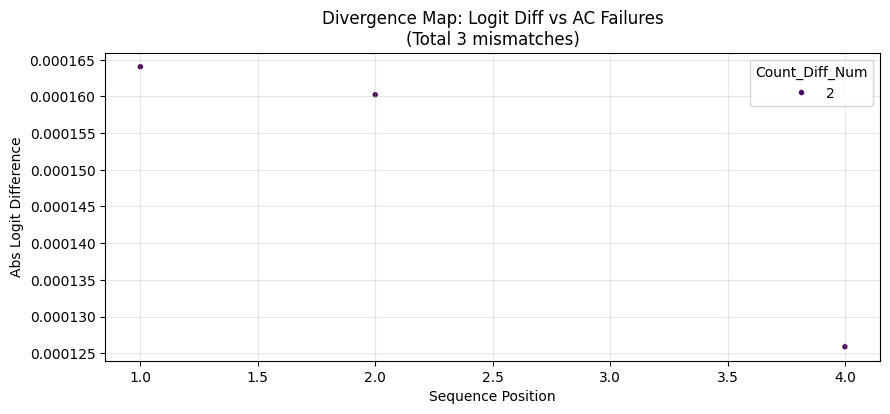

In [9]:
# Mismatch if parallel encoding/decoding is used due to precision issues
# Simple experiments to demonstrate this

import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utils import probs_to_counts

# 1. Setup
text_sample = "Logic is the beginning of wisdom."
# Use your existing sequential encoder
codec = LLM_Encode_KV_Cache(tokenizer, model, block_length=1024)
token_ids = tokenizer.encode(text_sample)

print(f"Testing on string: '{text_sample}' ({len(token_ids)} tokens)")

# ---------------------------------------------------------
# A. Sequential Generation (What your current code does)
# ---------------------------------------------------------
seq_logits_list = []
cache_state = codec._init_cache_state()

print("Running Sequential...")
for i in range(len(token_ids)):
    # Note: We are simulating the loop in your encode() method
    # 1. Get logits for current position
    logits = codec._ensure_next_logits(i, token_ids, cache_state)
    seq_logits_list.append(logits.detach().cpu())
    
    # 2. Update cache with the actual token
    if i < len(token_ids) - 1:
        codec._advance_cache(token_ids[i], cache_state)

# Stack into tensor: Shape [Seq_Len, Vocab]
seq_logits = torch.stack(seq_logits_list)

# ---------------------------------------------------------
# B. Parallel Generation (The "Fast" way that failed)
# ---------------------------------------------------------
print("Running Parallel...")
# Input is the sequence itself (Teacher Forcing)
# We need to predict positions 0..N. 
# Position 0 prediction comes from context []. 
# Position 1 prediction comes from context [tok0].
# Standard HF causal models handle this via causal mask.

# We feed the full sequence. 
# Note: To match your sequential logic exactly for the *first* token, 
# we need to handle the start case. 
# Your sequential code does `_context_slice` which returns empty -> fallback/pad.
# The standard parallel way is to feed a sequence. 

# For meaningful comparison, let's look at positions 1 to End (skipping the tricky start token)
# Input to model: [tok_0, tok_1, ... tok_N-1]
# Target labels:  [tok_1, tok_2, ... tok_N]

input_tensor = torch.tensor([token_ids], device=codec.device)

with torch.no_grad():
    parallel_output = model(input_tensor)
    
# parallel_logits[0, i] predicts token i+1 using tokens 0..i
# seq_logits[i+1] predicts token i+1 using tokens 0..i
# So we align them:
parallel_logits_aligned = parallel_output.logits[0, :-1, :] # Predicts tok 1..N
seq_logits_aligned = seq_logits[1:, :]                  # Predicts tok 1..N

# ---------------------------------------------------------
# C. Measure the Divergence
# ---------------------------------------------------------
# 1. Absolute Difference in Logits
diff = (seq_logits_aligned - parallel_logits_aligned).abs()
max_diff = diff.max().item()
mean_diff = diff.mean().item()

print(f"\n--- Results ---")
print(f"Max Logit Difference: {max_diff:.8f}")
print(f"Mean Logit Difference: {mean_diff:.8f}")

# 2. The "Butterfly Effect" on Arithmetic Coding
# Let's see if this difference changes the integer 'counts'
slots = 2**16 # Standard 16-bit slots
dec_prec = 100

mismatches = 0
rows = []

for t in range(len(seq_logits_aligned)):
    # Get probs
    p_seq = torch.softmax(seq_logits_aligned[t], dim=-1).numpy()
    p_par = torch.softmax(parallel_logits_aligned[t], dim=-1).numpy()
    
    # Convert to Counts (The critical step for Arithmetic Coding)
    c_seq = probs_to_counts(p_seq, slots, dec_prec)
    c_par = probs_to_counts(p_par, slots, dec_prec)
    
    # Check if the integer counts are identical
    if c_seq != c_par:
        mismatches += 1
        
        # Find the specific token where the count differed
        diff_indices = [i for i, (c1, c2) in enumerate(zip(c_seq, c_par)) if c1 != c2]
        
        rows.append({
            "Token_Pos": t,
            "Target_Token": tokenizer.decode([token_ids[t+1]]),
            "Count_Diff_Num": len(diff_indices),
            "Max_Logit_Diff": (seq_logits_aligned[t] - parallel_logits_aligned[t]).abs().max().item()
        })

print(f"\nArithmetic Coding Fatal Errors: {mismatches} out of {len(seq_logits_aligned)} steps")
if mismatches > 0:
    print("CONCLUSION: Parallel Encoding would have generated a file the Sequential Decoder could not read.")
else:
    print("CONCLUSION: No mismatches found (Lucky! or Precision is high enough).")

# ---------------------------------------------------------
# D. Visualization
# ---------------------------------------------------------
if mismatches > 0:
    df = pd.DataFrame(rows)
    plt.figure(figsize=(10, 4))
    sns.scatterplot(data=df, x="Token_Pos", y="Max_Logit_Diff", hue="Count_Diff_Num", size="Count_Diff_Num", palette="viridis")
    plt.title(f"Divergence Map: Logit Diff vs AC Failures\n(Total {mismatches} mismatches)")
    plt.ylabel("Abs Logit Difference")
    plt.xlabel("Sequence Position")
    plt.grid(True, alpha=0.3)
    plt.show()